In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Vin/Basic Machine Learning/Project/Semantic-Analysis-Vietnamese'
! ls

/content/drive/MyDrive/Vin/Basic Machine Learning/Project/Semantic-Analysis-Vietnamese
 binhluan.py	       'Phân tích dữ liệu.ipynb'   SVM_final.ipynb
 data		        preporocess.ipynb	   SVM.ipynb
'Data Analysis.ipynb'   Sentiment_Project.ipynb    vietnamese-stopwords.txt
 dataraw	        SVM_25_12_1.ipynb
 dataset	        SVM_final1.ipynb


In [3]:
contents = []
X_train = []
y_train = []
f = open("data/train_neg.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' '):
        X_train.append(line)
        contents.append(line)
        y_train.append(0)
f.close()

del X_train[-1]
del y_train[-1]
del contents[-1]

f = open("data/train_pos.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' ' and line != '\n'):
        X_train.append(line)
        contents.append(line)
        y_train.append(1)
f.close()
del X_train[-1]
del y_train[-1]
del contents[-1]



#X_val = []
#y_val = []
f = open("data/val_neg.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' ' ):
        X_train.append(line)
        contents.append(line)
        y_train.append(0)
f.close()
del X_train[-1]
del y_train[-1]
del contents[-1]

f = open("data/val_pos.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' ' and line != '\n'):
        X_train.append(line)
        contents.append(line)
        y_train.append(1)

f.close()
del X_train[-1]
del y_train[-1]
del contents[-1]

print(len(X_train))
print(len(y_train))


X_test = []
y_test = []
f = open("data/test_neg.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' ' and line != '\n'):
        X_test.append(line)
        contents.append(line)
        y_test.append(0)
f.close()

del X_test[-1]
del y_test[-1]
del contents[-1]

f = open("data/test_pos.txt", "r")
data = f.read()
lines = data.split("\n")
for line in lines:
    if( line != ' ' and line != '\n'):
        X_test.append(line)
        contents.append(line)
        y_test.append(1)
f.close()

del X_test[-1]
del y_test[-1]
del contents[-1]
print(len(X_test))
print(len(y_test))


40000
40000
10000
10000


In [4]:
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from scipy import sparse, io

from sklearn.svm import SVC
from sklearn import metrics
from scipy import io
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


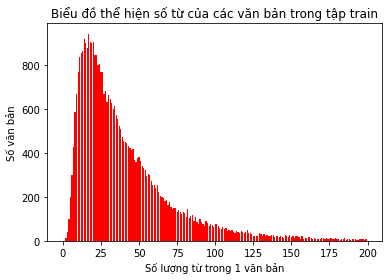

In [6]:
X_train_counts = [len(a.split()) for a in X_train if (len(a.split())< 200)]
len(X_train_counts)
X_train_count_unique = np.unique(X_train_counts, return_counts = True)
X_train_count_unique
plt.title('Biểu đồ thể hiện số từ của các văn bản trong tập train')
plt.xlabel('Số lượng từ trong 1 văn bản')
plt.ylabel('Số văn bản')
plt.bar(X_train_count_unique[0], X_train_count_unique[1], color='r')
plt.show()

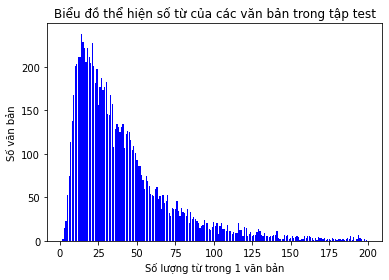

In [7]:
X_test_counts = [len(a.split()) for a in X_test if (len(a.split())< 200)]
len(X_train_counts)
X_test_count_unique = np.unique(X_test_counts, return_counts = True)
X_test_count_unique
plt.title('Biểu đồ thể hiện số từ của các văn bản trong tập test')
plt.xlabel('Số lượng từ trong 1 văn bản')
plt.ylabel('Số văn bản')
plt.bar(X_test_count_unique[0], X_test_count_unique[1], color='b')
plt.show()

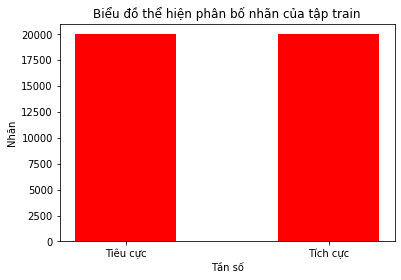

In [8]:

y_train_counts = np.unique(y_train, return_counts = True)
label = ['Tiêu cực', 'Tích cực']
plt.title('Biểu đồ thể hiện phân bố nhãn của tập train')
plt.xlabel('Tần số')
plt.ylabel('Nhãn')
plt.bar(label, y_train_counts[1], color='r', width=0.5)
plt.show()

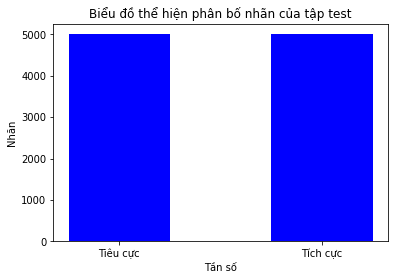

In [9]:
y_test_counts = np.unique(y_test, return_counts = True)
label = ['Tiêu cực', 'Tích cực']
plt.title('Biểu đồ thể hiện phân bố nhãn của tập test')
plt.xlabel('Tần số')
plt.ylabel('Nhãn')
plt.bar(label, y_test_counts[1], color='b', width = 0.5)
plt.show()